<a href="https://colab.research.google.com/github/ramzesssina/ML---labi/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **МЛ практика 5. Задача регрессии**

# **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

# **Задание состоит из следующих частей:**
Понимание значимости отбора признаков
Обучение регрессии
Метирки качества для регресии (только самые важные)
Регулязризация

# **Задачи для домашки ⏰**
Выбрать y = непрерывная переменая
Разделить на обучающую, тестовую и валидационную выборки
Выбрать лучшие признаки для X и выбрать лучший результат
Объяснить результаты метрик качества MAE, MSE, R2

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/nba.csv')
except FileNotFoundError:
    df = pd.read_csv('nba.csv')

y = df['GP'] # выбираем целевую переменную (количественная)
X = df.drop('GP', axis=1) # переменные для проверки влияния

In [68]:
X

,Name,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [69]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [70]:
X

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,...,Name_Willie Cauley-Stein,Name_Willie Green,Name_Willie Reed,Name_Willie White,Name_Wilson Chandler,Name_Winston Bennett,Name_Winston Garland,Name_Xavier McDaniel,Name_Zach LaVine,Name_Zach Randolph
0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,...,False,False,False,False,False,False,False,False,False,False
1,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,...,False,False,False,False,False,False,False,False,False,False
2,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,...,False,False,False,False,False,False,False,False,False,False
3,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,...,False,False,False,False,False,False,False,False,False,False
4,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,...,False,False,False,False,False,False,False,False,False,False
1336,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,...,False,False,False,False,False,False,False,False,False,False
1337,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,...,False,False,False,False,False,False,False,False,False,False
1338,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,...,False,False,False,False,False,False,False,False,False,False


In [71]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,...,Name_Willie Green,Name_Willie Reed,Name_Willie White,Name_Wilson Chandler,Name_Winston Bennett,Name_Winston Garland,Name_Xavier McDaniel,Name_Zach LaVine,Name_Zach Randolph,y
0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,...,False,False,False,False,False,False,False,False,False,36
1,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,...,False,False,False,False,False,False,False,False,False,35
2,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,...,False,False,False,False,False,False,False,False,False,74
3,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,...,False,False,False,False,False,False,False,False,False,58
4,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,...,False,False,False,False,False,False,False,False,False,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,...,False,False,False,False,False,False,False,False,False,80
1336,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,...,False,False,False,False,False,False,False,False,False,68
1337,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,...,False,False,False,False,False,False,False,False,False,43
1338,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,...,False,False,False,False,False,False,False,False,False,52


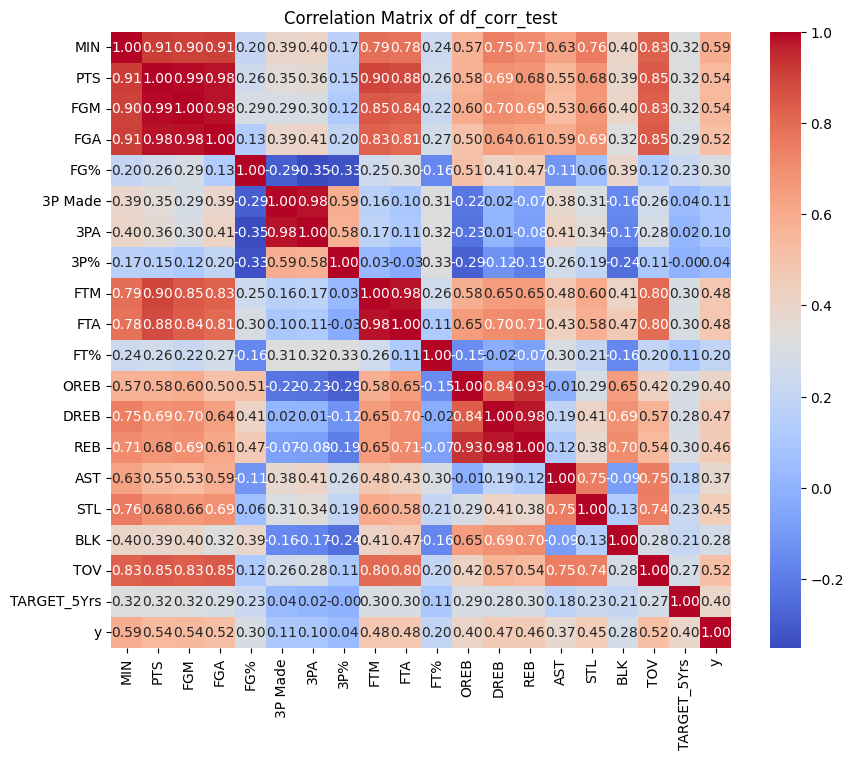

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    non = X_train.dropna().index
    X_train = X_train.loc[non]
    y_train = y_train.loc[non]

    non1 = X_test.dropna().index
    X_test = X_test.loc[non1]
    y_test = y_test.loc[non1]

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()
    elif regularization == 'l2':
        model = Ridge()
    else:
        model = LinearRegression()  # Без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [74]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать

Regularization: None
Mean Absolute Error (MAE): 21.95
Mean Squared Error (MSE): 809.23
R^2 Score: -1.77


In [75]:
resolve_regression(X[['FG%', '3P%', 'FT%']], y)
None

Regularization: None
Mean Absolute Error (MAE): 13.18
Mean Squared Error (MSE): 233.70
R^2 Score: 0.20


In [76]:
X

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,...,Name_Willie Cauley-Stein,Name_Willie Green,Name_Willie Reed,Name_Willie White,Name_Wilson Chandler,Name_Winston Bennett,Name_Winston Garland,Name_Xavier McDaniel,Name_Zach LaVine,Name_Zach Randolph
0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,...,False,False,False,False,False,False,False,False,False,False
1,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,...,False,False,False,False,False,False,False,False,False,False
2,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,...,False,False,False,False,False,False,False,False,False,False
3,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,...,False,False,False,False,False,False,False,False,False,False
4,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,...,False,False,False,False,False,False,False,False,False,False
1336,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,...,False,False,False,False,False,False,False,False,False,False
1337,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,...,False,False,False,False,False,False,False,False,False,False
1338,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,...,False,False,False,False,False,False,False,False,False,False


In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Columns: 1312 entries, MIN to Name_Zach Randolph
dtypes: bool(1293), float64(18), int64(1)
memory usage: 1.8 MB


In [78]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y

In [79]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

In [80]:
columns_to_drop = [col for col in X.columns if 'Name' in col]
X = X.drop(columns=columns_to_drop)

In [81]:
X

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [82]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X = X.dropna()
y = y.loc[X.index]
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)

In [83]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 11.37
Mean Squared Error (MSE): 203.72
R^2 Score: 0.35


In [84]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 11.38
Mean Squared Error (MSE): 196.43
R^2 Score: 0.37


Regularization: None
Mean Absolute Error (MAE): 11.38
Mean Squared Error (MSE): 196.43
R^2 Score: 0.37


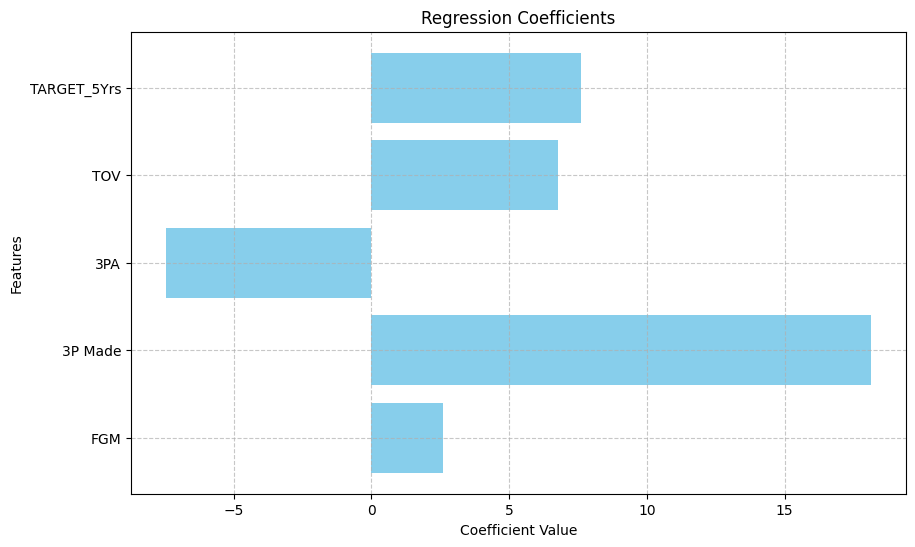

In [86]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)


# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)



На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для type_white указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки type_white, density и volatile acidity.

Метрики модели:

MAE (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
MSE (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
R² (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.
Дисперсия — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

Коэффициент детерминации 𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [90]:
X_selected_rfe

,FGM,3P Made,3PA,TOV,TARGET_5Yrs
0,2.6,0.5,2.1,1.3,0
1,2.0,0.7,2.8,1.6,0
2,2.0,0.4,1.7,1.0,0
3,2.3,0.1,0.5,1.0,1
4,1.6,0.0,0.1,0.8,1
...,...,...,...,...,...
1335,1.6,0.0,0.2,0.8,0
1336,1.5,0.1,0.7,1.3,1
1337,2.2,0.0,0.0,0.9,0
1338,1.7,0.0,0.2,0.8,1


In [95]:
# Выбираем числовые признаки

numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()

scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])

<ipython-input-95-793ab79c8246>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [97]:
X_selected_rfe

,FGM,3P Made,3PA,TOV,TARGET_5Yrs
0,0.232323,0.217391,0.323077,0.279070,0
1,0.171717,0.304348,0.430769,0.348837,0
2,0.171717,0.173913,0.261538,0.209302,0
3,0.202020,0.043478,0.076923,0.209302,1
4,0.131313,0.000000,0.015385,0.162791,1
...,...,...,...,...,...
1335,0.131313,0.000000,0.030769,0.162791,0
1336,0.121212,0.043478,0.107692,0.279070,1
1337,0.191919,0.000000,0.000000,0.186047,0
1338,0.141414,0.000000,0.030769,0.162791,1


Regularization: None
Mean Absolute Error (MAE): 11.38
Mean Squared Error (MSE): 196.43
R^2 Score: 0.37


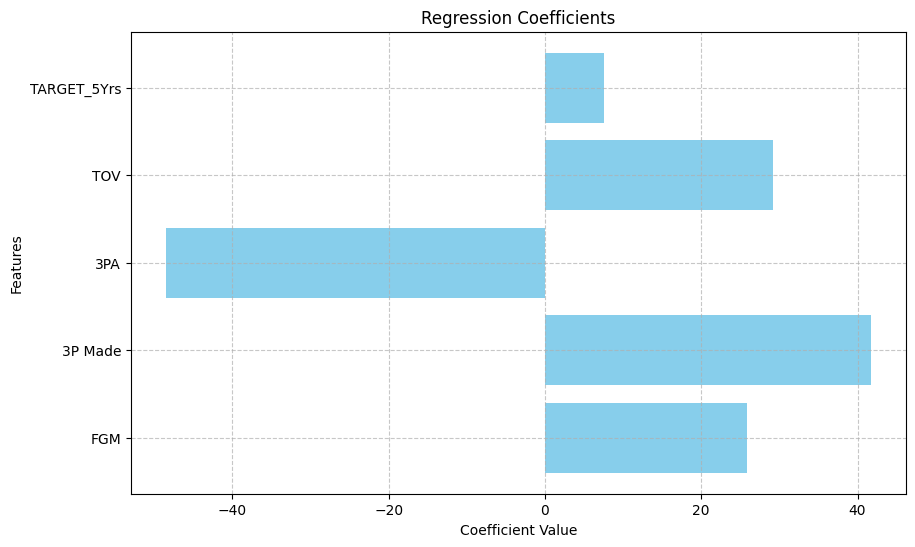

In [98]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

# **Пару слов про метрики**

In [99]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 11.38
Mean Squared Error (MSE): 196.43
R^2 Score: 0.37


# **Регуляризация**

In [100]:
X

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 10.61
Mean Squared Error (MSE): 177.93
R^2 Score: 0.43


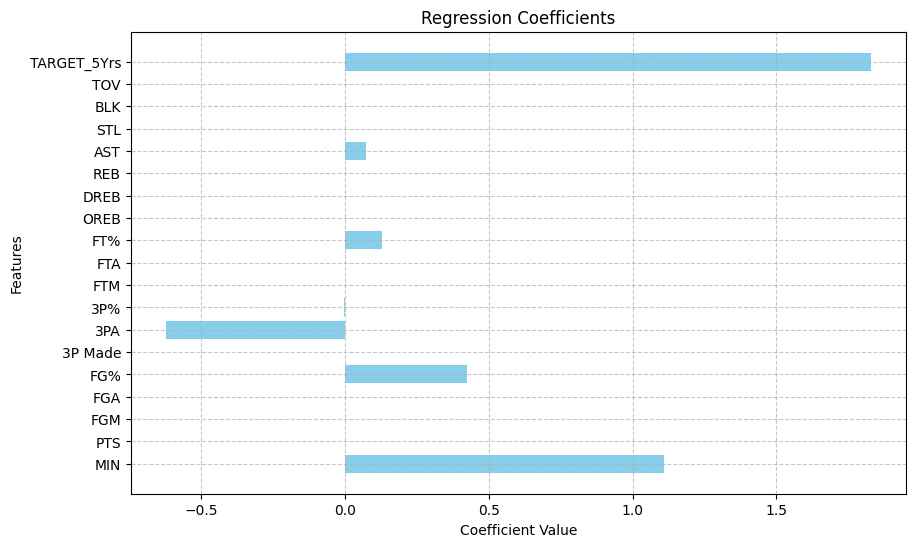

In [101]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: l2
Mean Absolute Error (MAE): 10.22
Mean Squared Error (MSE): 170.68
R^2 Score: 0.46


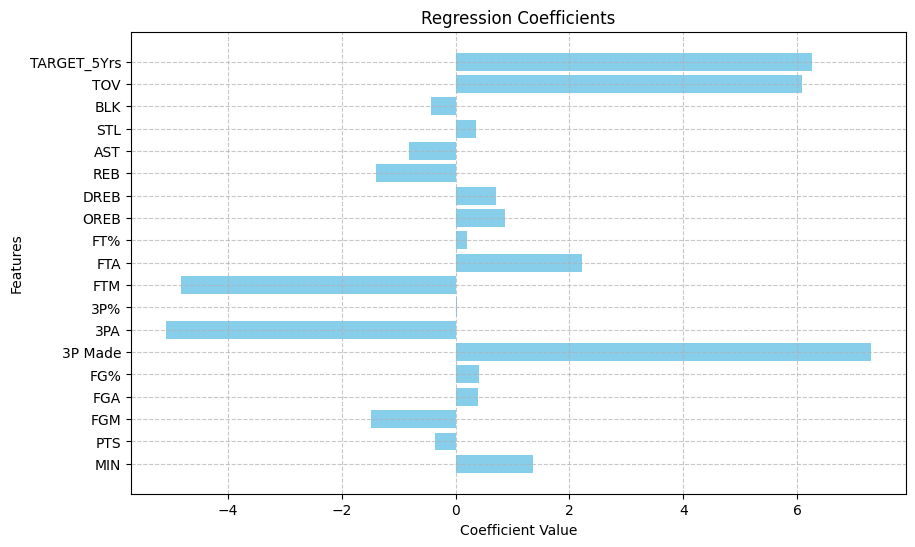

In [102]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 10.22
Mean Squared Error (MSE): 170.90
R^2 Score: 0.46


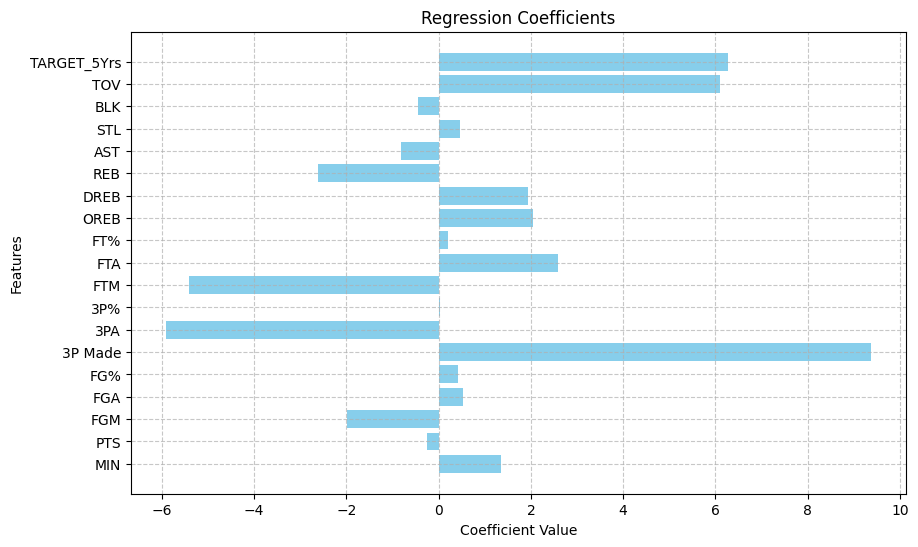

In [103]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)